Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


ROC-AUC Score: 0.9960


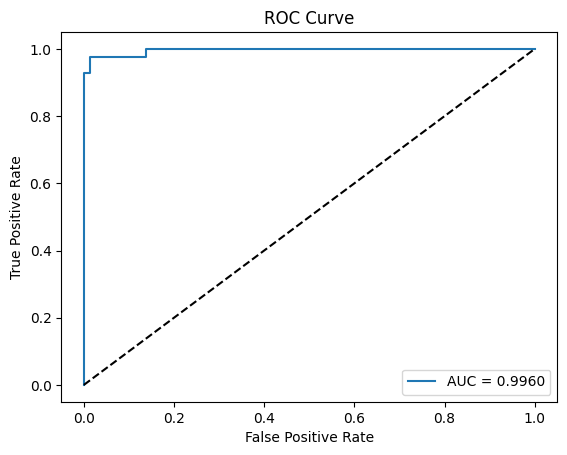


--- Threshold = 0.3 ---
Confusion Matrix:
 [[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


--- Threshold = 0.5 ---
Confusion Matrix:
 [[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


--- Threshold = 0.7 ---
Confusion Matrix:
 [[72  0]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95     

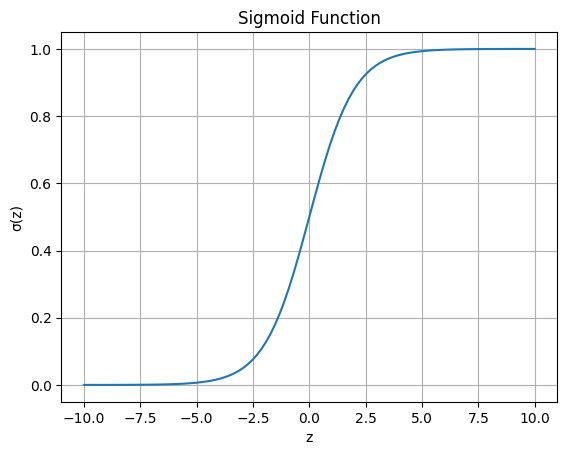

In [14]:
# -------------------------------------------
# Logistic Regression on Breast Cancer Dataset
# -------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

# 1️⃣ Load Dataset
df = pd.read_csv(r"C:\Users\VAIBHAVI\Downloads\data.csv")   # Make sure the Kaggle file is named data.csv
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Convert label to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2️⃣ Train/Test Split & Standardization
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# 4️⃣ Predictions & Evaluation
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {auc_score:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5️⃣ Threshold Tuning Function
def evaluate_threshold(threshold):
    y_pred_custom = (y_prob >= threshold).astype(int)
    print(f"\n--- Threshold = {threshold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
    print(classification_report(y_test, y_pred_custom))

# Try different thresholds
evaluate_threshold(0.3)
evaluate_threshold(0.5)
evaluate_threshold(0.7)

# 6️⃣ Sigmoid Function Visualization
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid()
plt.show()
